In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline    
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-darkgrid') 
from pylab import rcParams  
import plotly.graph_objs as go
import cufflinks
from statsmodels.tsa.stattools import adfuller

### GDP - Quarterly data for Greece

##### Dataset

https://ec.europa.eu/eurostat/databrowser/view/namq_10_gdp/default/table?lang=en

In [56]:
df= pd.read_csv('GDP - Quarterly data for Greece.csv')
df.head(5)

,DATAFLOW,LAST UPDATE,freq,unit,s_adj,na_item,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:NAMQ_10_GDP(1.0),30/09/22 11:00:00,Q,CLV10_MEUR,NSA,B1GQ,EL,1995-Q1,36093.0,NaN
1,ESTAT:NAMQ_10_GDP(1.0),30/09/22 11:00:00,Q,CLV10_MEUR,NSA,B1GQ,EL,1995-Q2,37626.6,NaN
2,ESTAT:NAMQ_10_GDP(1.0),30/09/22 11:00:00,Q,CLV10_MEUR,NSA,B1GQ,EL,1995-Q3,41931.6,NaN
3,ESTAT:NAMQ_10_GDP(1.0),30/09/22 11:00:00,Q,CLV10_MEUR,NSA,B1GQ,EL,1995-Q4,41784.8,NaN
4,ESTAT:NAMQ_10_GDP(1.0),30/09/22 11:00:00,Q,CLV10_MEUR,NSA,B1GQ,EL,1996-Q1,37126.0,NaN


In [57]:
df = df[df['unit'] == 'CP_MEUR'] # Current prices, million euro
df = df[df['s_adj'] == 'SCA']
df.reset_index(inplace=True)
df.drop(['index', 'DATAFLOW', 'LAST UPDATE', 'freq', 's_adj', 'unit', 'geo', 'OBS_FLAG', 'na_item'], inplace=True, axis=1)
df.head()

,TIME_PERIOD,OBS_VALUE
0,1995-Q1,25698.5
1,1995-Q2,25955.2
2,1995-Q3,26415.9
3,1995-Q4,26457.2
4,1996-Q1,27049.4


In [59]:
df.rename(columns = {'TIME_PERIOD':'Date'}, inplace = True)
df.rename(columns = {'OBS_VALUE':'GDP'}, inplace = True)
df['Date'].replace(regex=True,inplace=True, to_replace='M',value='')
df['Date'] =  pd.to_datetime(df['Date'], format='%Y%m', errors='ignore', infer_datetime_format=True)

In [64]:
df.head()

,Date,GDP
0,1995-01-01,25698.5
1,1995-04-01,25955.2
2,1995-07-01,26415.9
3,1995-10-01,26457.2
4,1996-01-01,27049.4


Text(0.5, 1.0, 'GDP through time')

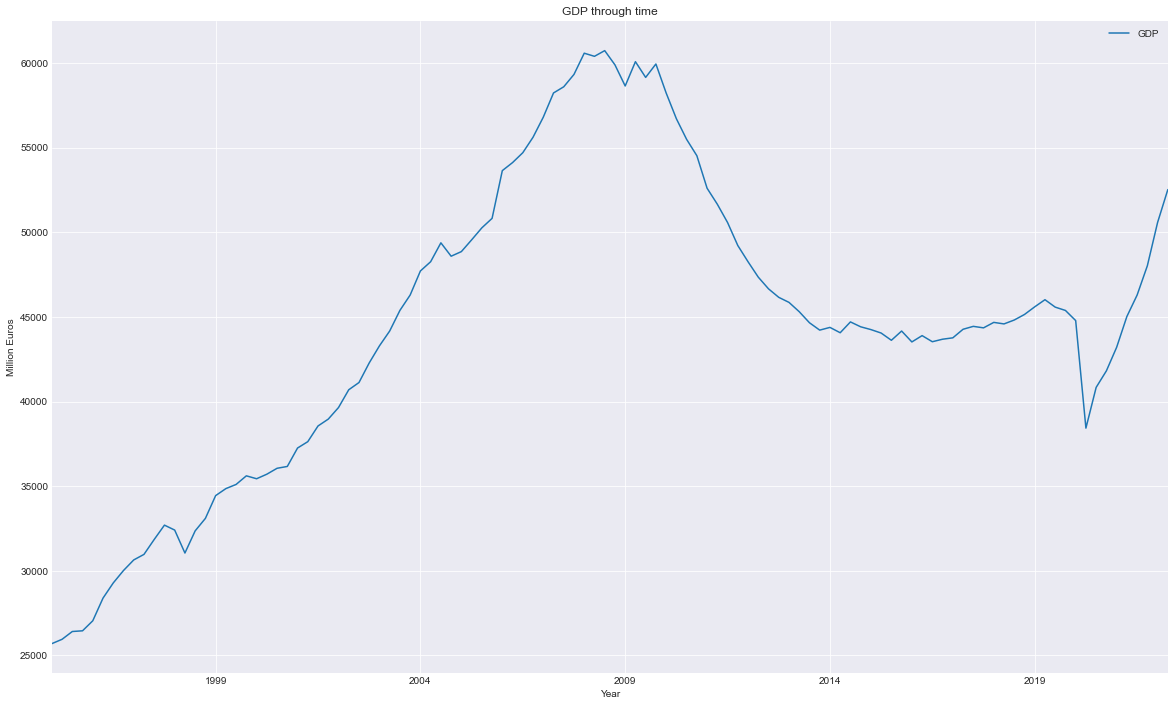

In [62]:
rcParams['figure.figsize'] = 20, 12
df.plot(x = 'Date', y = 'GDP')
plt.xlabel('Year')
plt.ylabel('Million Euros')
plt.title('GDP through time')

### Real GDP per capita

##### Dataset

https://ec.europa.eu/eurostat/databrowser/view/sdg_08_10/default/table?lang=en

In [28]:
df= pd.read_csv('Real GDP per capita.csv')
df.head(5)

,DATAFLOW,LAST UPDATE,freq,unit,na_item,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:SDG_08_10(1.0),27/09/22 23:00:00,A,CLV10_EUR_HAB,B1GQ,AL,2000,1700.0,NaN
1,ESTAT:SDG_08_10(1.0),27/09/22 23:00:00,A,CLV10_EUR_HAB,B1GQ,AL,2001,1850.0,NaN
2,ESTAT:SDG_08_10(1.0),27/09/22 23:00:00,A,CLV10_EUR_HAB,B1GQ,AL,2002,1940.0,NaN
3,ESTAT:SDG_08_10(1.0),27/09/22 23:00:00,A,CLV10_EUR_HAB,B1GQ,AL,2003,2060.0,NaN
4,ESTAT:SDG_08_10(1.0),27/09/22 23:00:00,A,CLV10_EUR_HAB,B1GQ,AL,2004,2180.0,NaN


In [29]:
df = df[df['geo'] == 'EL'] 
df = df[df['unit'] == 'CLV10_EUR_HAB'] #euro per capita
df.reset_index(inplace=True)
df.drop(['index', 'DATAFLOW', 'LAST UPDATE', 'freq', 'unit', 'geo', 'OBS_FLAG', 'na_item'], inplace=True, axis=1)
df.rename(columns = {'TIME_PERIOD':'Year'}, inplace = True)
df.rename(columns = {'OBS_VALUE':'Euro per capita'}, inplace = True)
df

,Year,Euro per capita
0,2000,17430.0
1,2001,18050.0
2,2002,18690.0
3,2003,19730.0
4,2004,20670.0
5,2005,20740.0
6,2006,21840.0
7,2007,22500.0
8,2008,22370.0
9,2009,21350.0


Text(0.5, 1.0, 'Euro per capita through time')

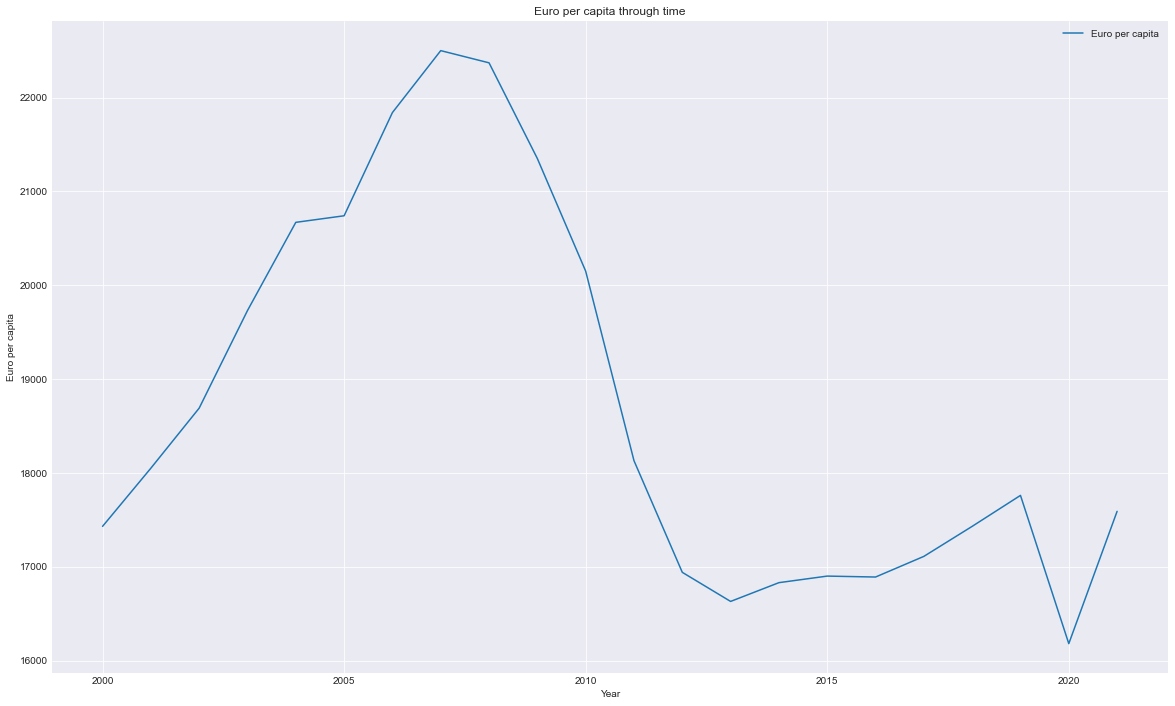

In [33]:
rcParams['figure.figsize'] = 20, 12
df.plot(x = 'Year', y = 'Euro per capita')
plt.xlabel('Year')
plt.ylabel('Euro per capita')
plt.title('Euro per capita through time')